In [18]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    ----------------

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


iris = datasets.load_iris()
X = iris.data 
y = iris.target 


Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


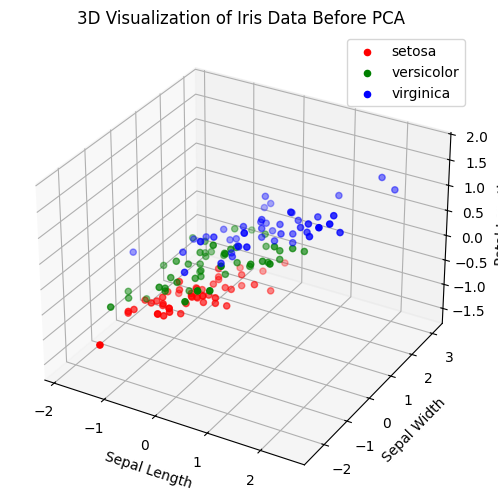

Singular Values: [20.92306556 11.7091661   4.69185798  1.76273239]
Explained Variance by PC1: 0.73
Explained Variance by PC2: 0.23


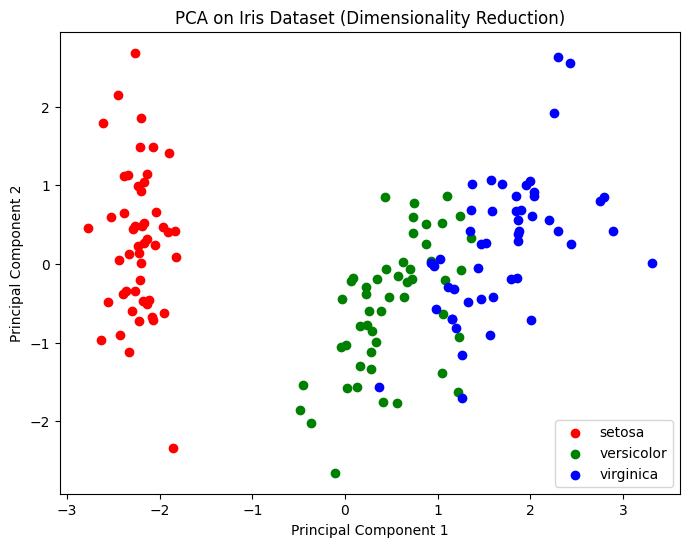

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Covariance Matrix and Eigenvalues/Eigenvectors
cov_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", cov_matrix)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Step 3: 3D Visualization Before PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']
labels = iris.target_names

for i in range(len(colors)):
    ax.scatter(
        X_scaled[y == i, 0],
        X_scaled[y == i, 1],
        X_scaled[y == i, 2],
        color=colors[i],
        label=labels[i]
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Visualization of Iris Data Before PCA')
plt.legend()
plt.show()

# Step 4: PCA Using SVD
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)
print("Singular Values:", S)

# Step 5: PCA for 2D Projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Variance Explained
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")

# Step 7: Visualize 2D PCA Output
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=labels[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset (Dimensionality Reduction)')
plt.legend()
plt.show()
